In [45]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [46]:
#Loading the Dataset
my_dataset = pd.read_csv("/content/framingham.csv")
my_dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# **Exploratory Data Analysis**

In [47]:
my_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [48]:
#Drop the Education Column from the Dataset as it is useless in Disease Prediction
df = my_dataset.drop('education', axis = 1)

In [49]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [50]:
df.isnull().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50
sysBP,0


In [51]:
#Filling the Missing Value in the Dataset
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].median())
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4238 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4238 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4238 non-null   float64
 12  heartRate        4238 non-null   float64
 13  glucose          4238 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [53]:
df.isnull().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0


In [54]:
df.duplicated().sum()

np.int64(0)

In [55]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,0.494101,8.941482,0.029259,0.005899,0.310524,0.025720,236.689476,132.352407,82.893464,25.800205,75.878716,81.603587,0.151958
std,0.495022,8.572160,0.500024,11.902399,0.168552,0.076587,0.462763,0.158316,44.327427,22.038097,11.910850,4.071041,12.025185,22.865246,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Text(0.5, 1.0, 'Age vs Heart Disease')

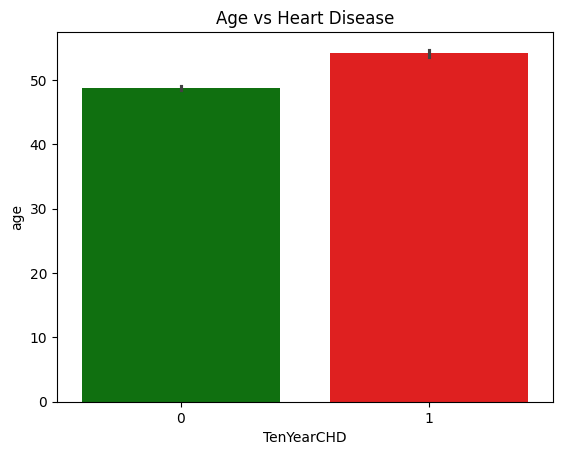

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = 'TenYearCHD', y = 'age', data = df, palette = {'0': 'green', '1': 'red'})
plt.title("Age vs Heart Disease")

As the Age Increases, the chances of Heart Diseases also Increases

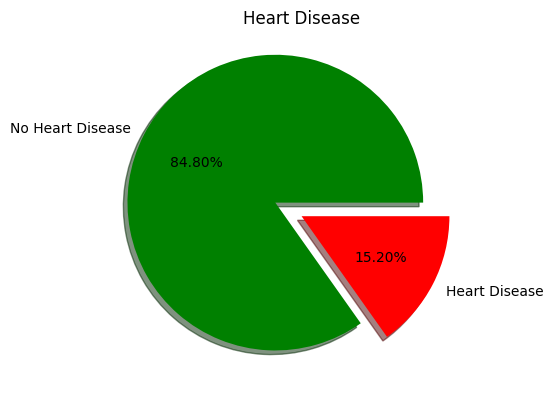

In [57]:
# Pie Plot of Heart Disease Classes
labels = ["No Heart Disease", "Heart Disease"]
percentage = df['TenYearCHD'].value_counts(normalize = True)*100
explode = (0.2,0)
colors = ["green", "red"]
plt.pie(percentage, labels = labels, explode = explode, colors = colors, shadow = True, autopct = '%.2f%%')
plt.title("Heart Disease")
plt.show()


In [58]:
df.groupby("diabetes")["TenYearCHD"].value_counts()

diabetes  TenYearCHD
0         0             3525
          1              604
1         0               69
          1               40
Name: count, dtype: int64

Text(0.5, 1.0, 'Diabetes v/s Heart Disease')

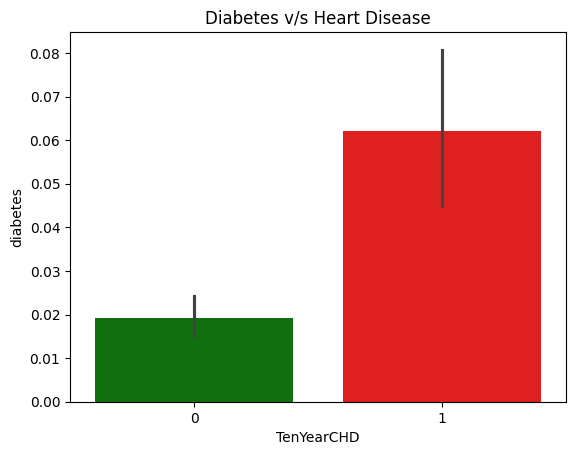

In [59]:
sns.barplot(x = "TenYearCHD", y = "diabetes", data = df, palette = {"0":"green", "1":"red"})
plt.title("Diabetes v/s Heart Disease")

In [60]:
df.groupby("currentSmoker")["TenYearCHD"].mean()

,TenYearCHD
currentSmoker,
0,0.145056
1,0.159026


Text(0.5, 1.0, 'Smoker v/s Heart Disease')

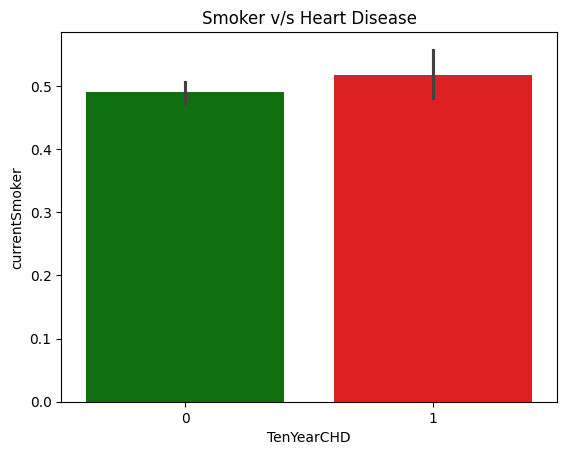

In [61]:
sns.barplot(x = "TenYearCHD", y = "currentSmoker", data = df, palette = {"0":"green", "1":"red"})
plt.title("Smoker v/s Heart Disease")

In [62]:
df.groupby("prevalentStroke")["TenYearCHD"].mean()

,TenYearCHD
prevalentStroke,
0,0.150249
1,0.440000


Text(0.5, 1.0, 'Prevalent Stroke v/s Heart Disease')

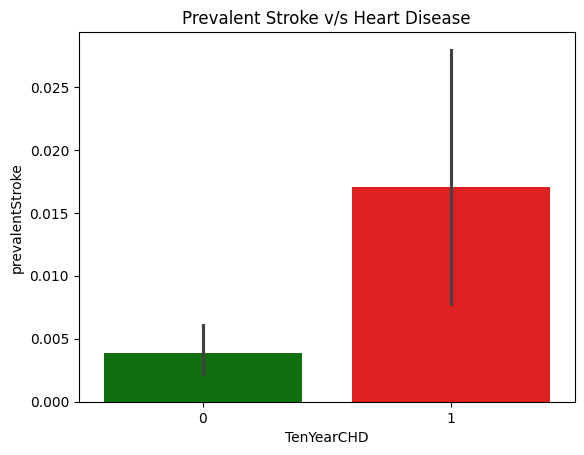

In [63]:
sns.barplot(x = "TenYearCHD", y = "prevalentStroke", data = df, palette = {"0":"green", "1":"red"})
plt.title("Prevalent Stroke v/s Heart Disease")

In [64]:
df.groupby("TenYearCHD")["cigsPerDay"].mean()

,cigsPerDay
TenYearCHD,
0,8.644964
1,10.596273


Text(0.5, 1.0, 'Cigs/Day v/s Heart Disease')

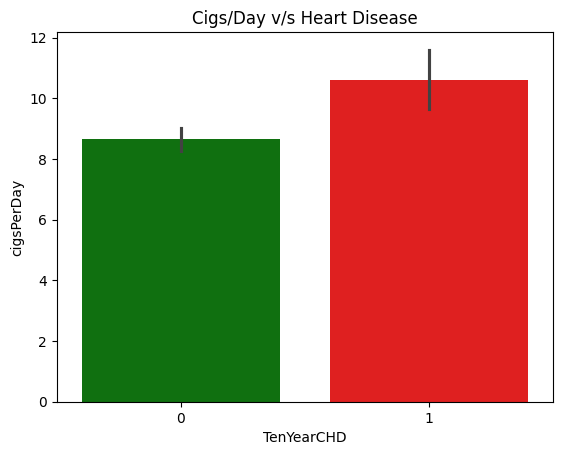

In [65]:
sns.barplot(x = "TenYearCHD", y = "cigsPerDay", data = df, palette = {"0":"green", "1":"red"})
plt.title("Cigs/Day v/s Heart Disease")

<Axes: xlabel='cigsPerDay', ylabel='age'>

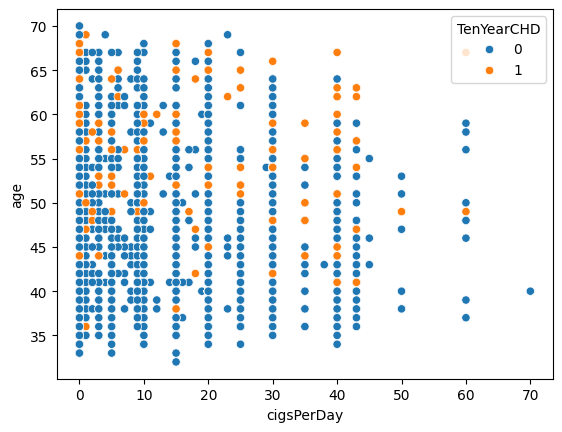

In [66]:
sns.scatterplot(x = "cigsPerDay", y = "age", hue = "TenYearCHD", data = df)

In [67]:
df.groupby("male")["TenYearCHD"].mean()

,TenYearCHD
male,
0,0.124432
1,0.188565


Text(0.5, 1.0, 'BMI v/s Heart Disease')

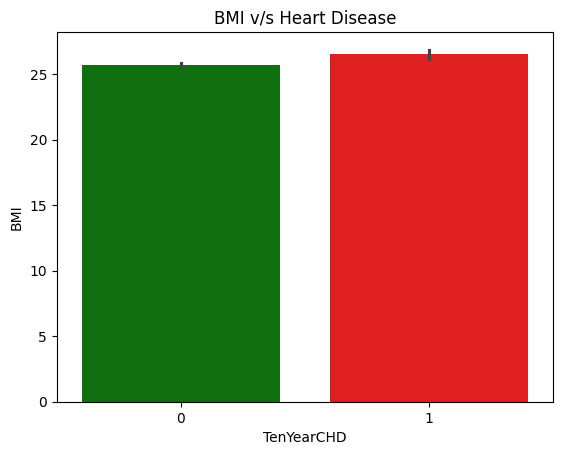

In [68]:
sns.barplot(x = "TenYearCHD", y = "BMI", data = df, palette = {"0":"green", "1":"red"})
plt.title("BMI v/s Heart Disease")

<Axes: >

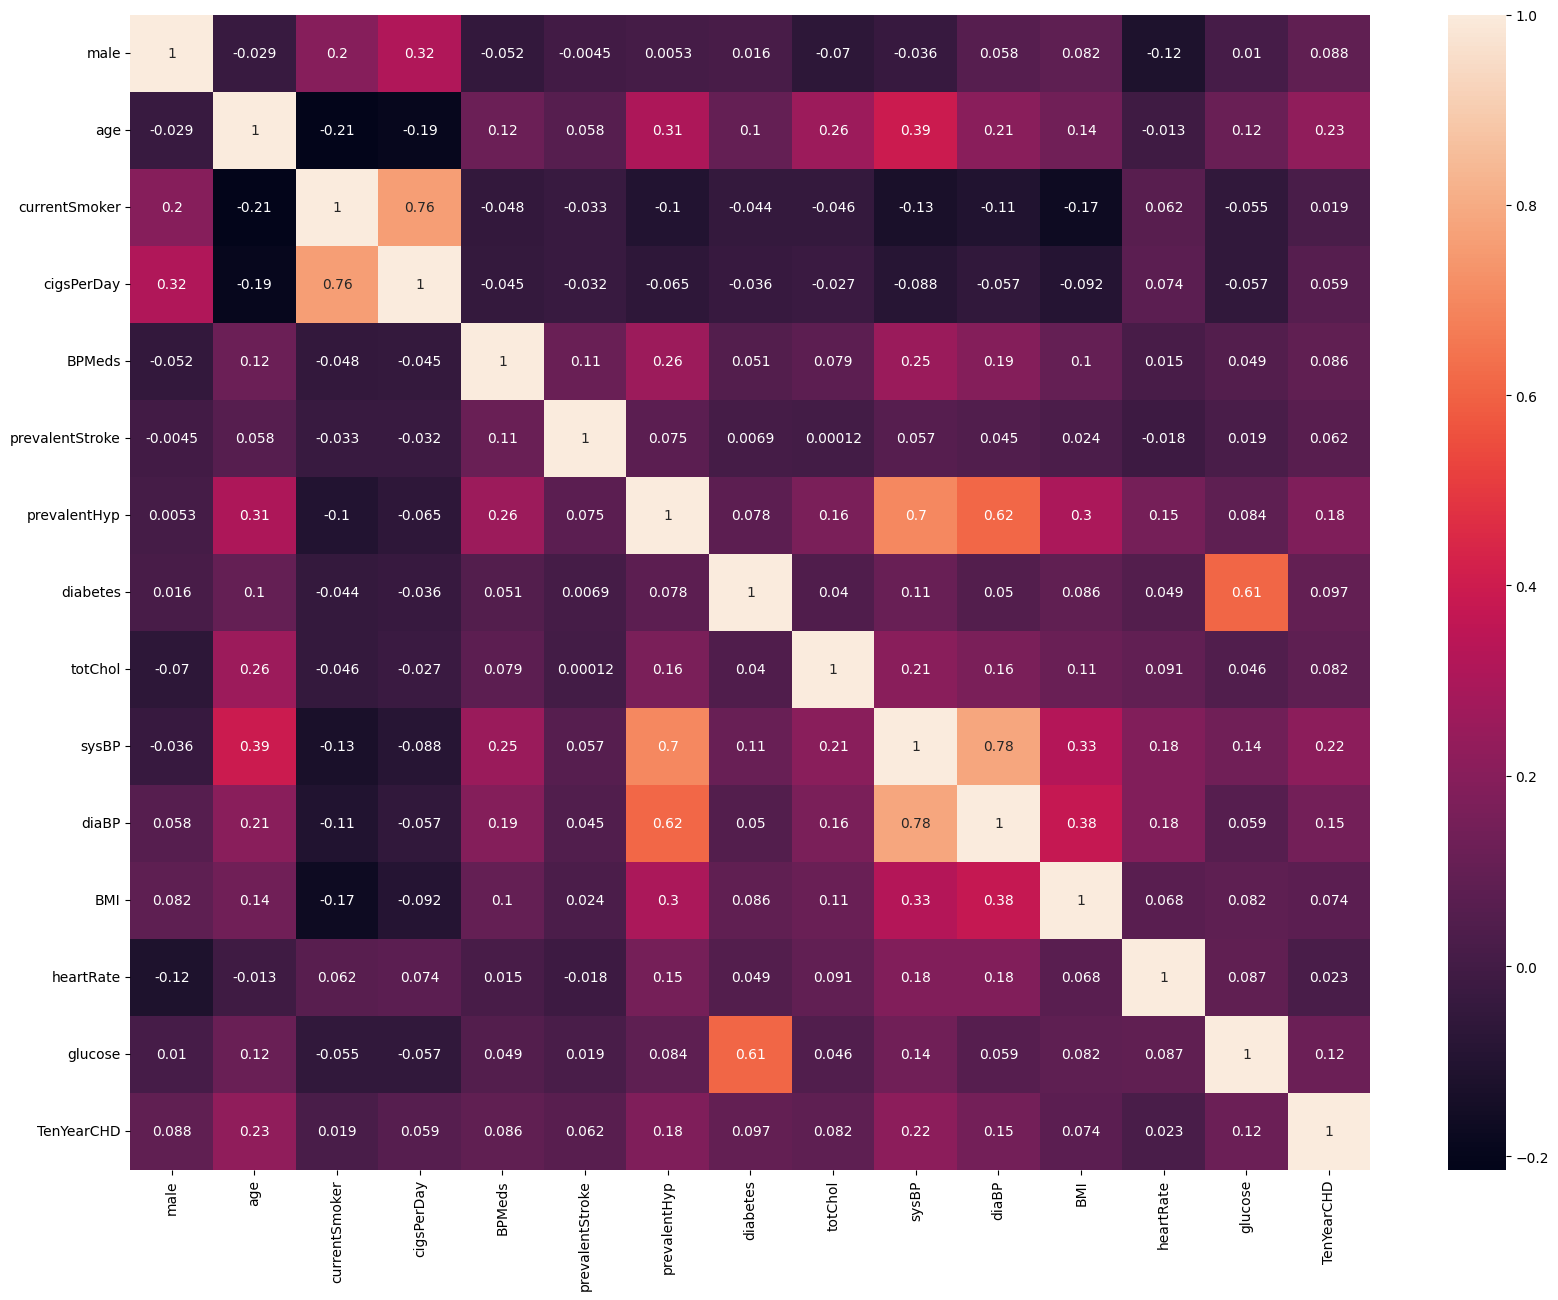

In [69]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True)

In [70]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [71]:
correlation(df, 0.90)

set()

# **Building Machine Learning Model**

In [72]:
# Distribution of Input and output Attributes
x = df.drop("TenYearCHD", axis = 1)
y = df["TenYearCHD"]

In [73]:
#Train Test Split of the Data to Train and Test the Model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 42)

In [74]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled  = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

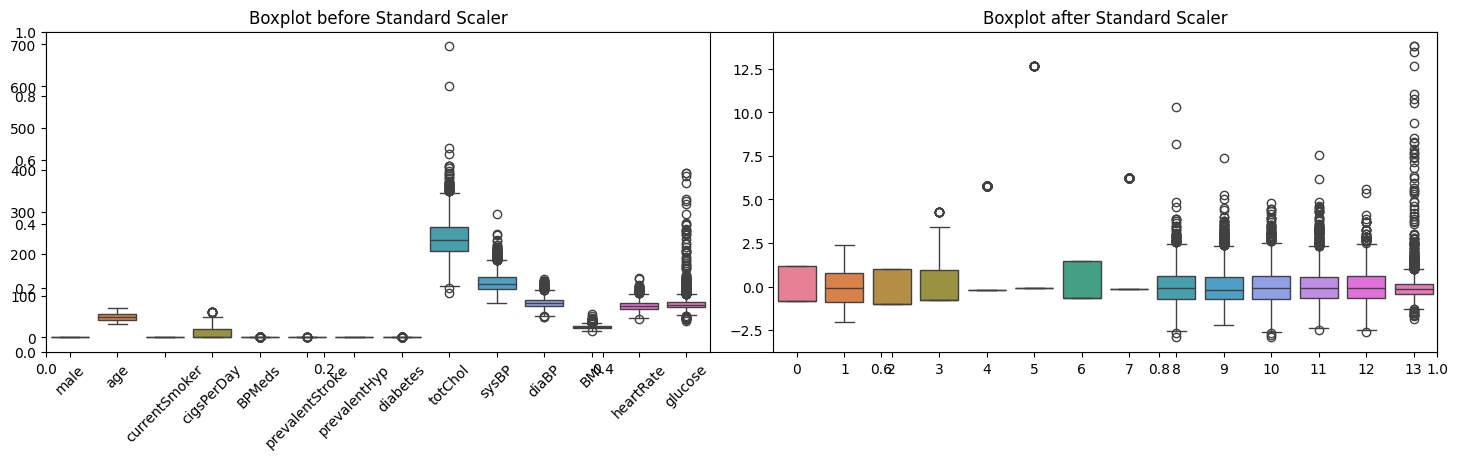

In [75]:
# Boxplot Before and After the Standard Scaling
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = x_train)
plt.title("Boxplot before Standard Scaler")
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.boxplot(data = x_train_scaled)
plt.title("Boxplot after Standard Scaler")

plt.tight_layout()
plt.show()

In [76]:
# Fitting the Logistic Regresssion Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train_scaled, y_train)

import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'logistic_model.pkl')

from google.colab import files
files.download('scaler.pkl')
files.download('logistic_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
#Training Prediction
y_train_pred = model.predict(x_train_scaled)

# Checking the Performance while Training
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, classification_report

print("Training Performance Matrix")
print("Accuracy Score: ", round(accuracy_score(y_train, y_train_pred),2))
print("Precision Score: ", round(precision_score(y_train, y_train_pred),2))
print("Recall Score: ", round(recall_score(y_train, y_train_pred),2))
print("Confusion Matrix\n: ", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

Training Performance Matrix
Accuracy Score:  0.85
Precision Score:  0.69
Recall Score:  0.09
Confusion Matrix
:  [[2848   22]
 [ 471   49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      2870
           1       0.69      0.09      0.17       520

    accuracy                           0.85      3390
   macro avg       0.77      0.54      0.54      3390
weighted avg       0.83      0.85      0.80      3390



In [78]:
#Testing Prediction
y_test_pred = model.predict(x_test_scaled)

# Checking the Performance while Testing
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, classification_report

print("Testing Performance Matrix")
print("Accuracy Score: ", round(accuracy_score(y_test, y_test_pred),2))
print("Precision Score: ", round(precision_score(y_test, y_test_pred),2))
print("Recall Score: ", round(recall_score(y_test, y_test_pred),2))
print("Confusion Matrix:\n ", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n ", classification_report(y_test, y_test_pred))

Testing Performance Matrix
Accuracy Score:  0.86
Precision Score:  0.6
Recall Score:  0.07
Confusion Matrix:
  [[718   6]
 [115   9]]
Classification Report:
                precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



In [79]:
#To check whether the Classes of Dataset is Balanced or Imbalanced
from collections import Counter
Counter(y) # As they are Imbalanced

Counter({0: 3594, 1: 644})

In [80]:
# Hyperperimeter Tuning
model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
c_values=[100,10,1,0.01,0.1]
class_weight =[{0:w, 1:y} for w in [1,10,50,100] for y in [1,10,50,100]]  # When the Dataset is Imbalanced
params = dict(penalty = penalty, solver = solver, C = c_values, class_weight = class_weight)

In [81]:
# Cross Validation
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

#Hyperperimeter Tuning through Grid Search CV
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = params, scoring = 'recall', cv = cv, n_jobs = -1)

grid.fit(x_train_scaled, y_train)
y_pred_grid =grid.predict(x_test_scaled)

In [82]:
# Performance Matrix
print("Testing Performance Scores of GridSearchCV")
print("Accuracy Score: ", round(accuracy_score(y_test, y_pred_grid),2))
print("Precision Score: ", round(precision_score(y_test, y_pred_grid),2))
print("Recall Score: ", round(recall_score(y_test, y_pred_grid),2))
print("Confusion Matrix:\n ", confusion_matrix(y_test, y_pred_grid))
print("Classification Report:\n ", classification_report(y_test, y_pred_grid))
print("Best Params from GridSearch:", grid.best_params_)
print("Best Recall from GridSearch:", grid.best_score_)

Testing Performance Scores of GridSearchCV
Accuracy Score:  0.15
Precision Score:  0.15
Recall Score:  1.0
Confusion Matrix:
  [[  0 724]
 [  0 124]]
Classification Report:
                precision    recall  f1-score   support

           0       0.00      0.00      0.00       724
           1       0.15      1.00      0.26       124

    accuracy                           0.15       848
   macro avg       0.07      0.50      0.13       848
weighted avg       0.02      0.15      0.04       848

Best Params from GridSearch: {'C': 100, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l1', 'solver': 'liblinear'}
Best Recall from GridSearch: 1.0


In [83]:
# Hyperperimeter Tuning through RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator = model, param_distributions = params, scoring = 'recall', cv = cv, n_jobs = -1)
random.fit(x_train_scaled, y_train)
y_random_pred = random.predict(x_test_scaled)

In [84]:
# Performance Matrix
print("Testing Performance Scores of RandomizedSearchCV")
print("Accuracy Score: ", round(accuracy_score(y_test, y_random_pred),2))
print("Precision Score: ", round(precision_score(y_test, y_random_pred),2))
print("Recall Score: ", round(recall_score(y_test, y_random_pred),2))
print("Confusion Matrix:\n ", confusion_matrix(y_test, y_random_pred))
print("Classification Report: \n", classification_report(y_test, y_random_pred))
print("Best Params from RandomSearch:", random.best_params_)
print("Best Recall from RandomSearch:", random.best_score_)

Testing Performance Scores of RandomizedSearchCV
Accuracy Score:  0.48
Precision Score:  0.2
Recall Score:  0.83
Confusion Matrix:
  [[302 422]
 [ 21 103]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.42      0.58       724
           1       0.20      0.83      0.32       124

    accuracy                           0.48       848
   macro avg       0.57      0.62      0.45       848
weighted avg       0.83      0.48      0.54       848

Best Params from RandomSearch: {'solver': 'saga', 'penalty': 'l2', 'class_weight': {0: 1, 1: 10}, 'C': 10}
Best Recall from RandomSearch: 0.825


In [85]:
# AUC - ROC Score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Create a Dummy Model with default 0 as o/p
dummy_model_prob = [0 for _ in range(len(y_test))]
#Create Basic Logistic Model
# model = LogisticRegression()
# model.fit(x_train_scaled, y_train)
# model_prob = model.predict_proba(x_test_scaled)[:,1]
best_model = grid.best_estimator_
model_prob = best_model.predict_proba(x_test_scaled)[:, 1]
#Lets Calculate Scores
print("Dummy Model AUC: ", roc_auc_score(y_test, dummy_model_prob))
print("Basic Model AUC: ", roc_auc_score(y_test, model_prob))


Dummy Model AUC:  0.5
Basic Model AUC:  0.7099447513812154


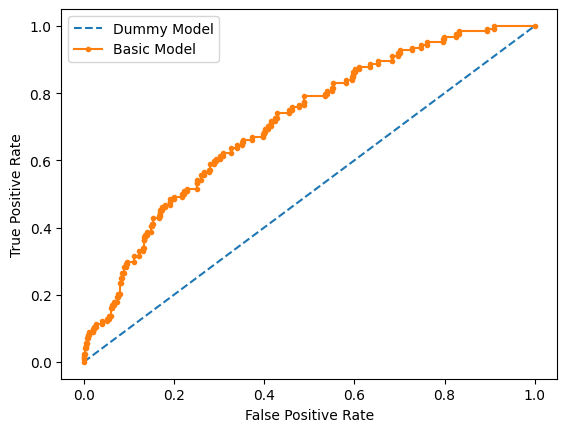

In [86]:
# Calculate ROC Curve
dummy_fpr, dummy_tpr, dummy_threshold = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, threshold = roc_curve(y_test, model_prob)

# Plot ROC Curve for the Model
plt.plot(dummy_fpr, dummy_tpr, linestyle = '--', label = 'Dummy Model')
plt.plot(model_fpr, model_tpr, marker = '.', label = 'Basic Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

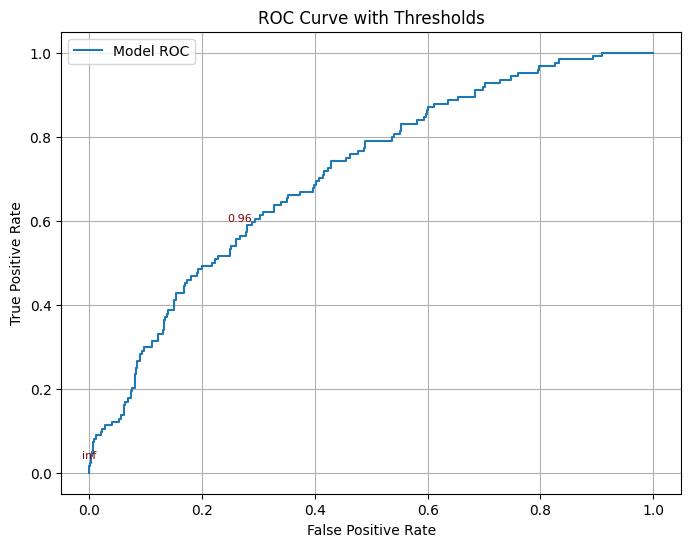

In [87]:
# Create figure and axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# Plot ROC Curve
ax.plot(model_fpr, model_tpr, label='Model ROC')

# Annotate thresholds (only a few to avoid clutter)
for i in range(0, len(threshold), 100):  # Change 100 to a smaller value if data is small
    ax.annotate(f'{threshold[i]:.2f}',
                xy=(model_fpr[i], model_tpr[i]),
                textcoords="offset points",
                xytext=(0,10),
                ha='center',
                fontsize=8,
                color='darkred')

# Labels and Legend
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve with Thresholds")
ax.legend()
ax.grid(True)
plt.show()

# **🔥 Final CHD Prediction Model for Patients**

In [88]:
# streamlit_chd_predictor.py
!pip install streamlit
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import joblib  # For loading saved model and scaler

# Load your trained model and scaler (assumes you've saved them using joblib)
model = joblib.load('logistic_model.pkl')
scaler = joblib.load('scaler.pkl')

st.title("💓 10-Year CHD Risk Predictor")

st.write("Please select your details below:")

# Gender
male = st.radio("Gender", options=[1, 0], format_func=lambda x: 'Male' if x == 1 else 'Female')

# Age
age = st.slider("Age", 20, 90, 50)

# Smoker
currentSmoker = st.radio("Are you a current smoker?", [1, 0], format_func=lambda x: "Yes" if x == 1 else "No")
cigsPerDay = st.slider("Cigarettes per Day", 0, 50, 0) if currentSmoker == 1 else 0

# Blood Pressure Medication
BPMeds = st.radio("On BP Medication?", [1, 0], format_func=lambda x: "Yes" if x == 1 else "No")

# Stroke
prevalentStroke = st.radio("Any prior stroke?", [1, 0], format_func=lambda x: "Yes" if x == 1 else "No")

# Hypertension
prevalentHyp = st.radio("Has Hypertension?", [1, 0], format_func=lambda x: "Yes" if x == 1 else "No")

# Diabetes
diabetes = st.radio("Has Diabetes?", [1, 0], format_func=lambda x: "Yes" if x == 1 else "No")

# Other numeric inputs
totChol = st.number_input("Total Cholesterol", value=200.0)
sysBP = st.number_input("Systolic BP", value=130.0)
diaBP = st.number_input("Diastolic BP", value=80.0)
BMI = st.number_input("BMI", value=25.0)
heartRate = st.number_input("Heart Rate", value=72.0)
glucose = st.number_input("Glucose Level", value=100.0)

# Collect input into DataFrame
input_data = pd.DataFrame([{
    'male': male,
    'age': age,
    'currentSmoker': currentSmoker,
    'cigsPerDay': cigsPerDay,
    'BPMeds': BPMeds,
    'prevalentStroke': prevalentStroke,
    'prevalentHyp': prevalentHyp,
    'diabetes': diabetes,
    'totChol': totChol,
    'sysBP': sysBP,
    'diaBP': diaBP,
    'BMI': BMI,
    'heartRate': heartRate,
    'glucose': glucose
}])

# Predict button
if st.button("Predict CHD Risk"):
    # Scale the input
    input_scaled = scaler.transform(input_data)

    # Predict probability and class
    prob = model.predict_proba(input_scaled)[0][1]
    pred = model.predict(input_scaled)[0]

    # Show results
    st.subheader("🔍 Prediction Result:")
    st.write(f"**CHD Risk Probability (10 years):** {round(prob, 2)}")
    if pred == 1:
        st.error("⚠️ Heart Disease Risk Detected")
    else:
        st.success("✅ No Heart Disease Risk")


2025-06-20 10:54:02.650 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 10:54:02.650 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 10:54:02.652 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 10:54:02.653 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 10:54:02.655 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 10:54:02.656 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 10:54:02.657 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 10:54:02.659 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar